<a href="https://colab.research.google.com/github/SEOYUNJE/Endoscope-Object-Detection/blob/main/Weighted-Boxes-Fusion/GastroScopy/WBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q opendatasets

import opendatasets as od

od.download('https://www.kaggle.com/datasets/seoyunje/gastroscopy-submission')
od.download('https://www.kaggle.com/datasets/seoyunje/gastroscopy-256x256-resized-png')
od.download('https://www.kaggle.com/datasets/msyu78/gastroscopy-meta')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: seoyunje
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/seoyunje/gastroscopy-submission


100%|██████████| 8.63M/8.63M [00:00<00:00, 46.5MB/s]



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: seoyunje
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/seoyunje/gastroscopy-256x256-resized-png


100%|██████████| 177M/177M [00:01<00:00, 93.3MB/s]



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: seoyunje
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/msyu78/gastroscopy-meta


100%|██████████| 802k/802k [00:00<00:00, 103MB/s]

## Decoding PredictionString
___

In [ ]:
import pandas as pd
import numpy as np

from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
import cv2

**Utils Function**

In [ ]:
def string_decoder(predict_string):
    s = predict_string.split(' ')
    class_id = [x for x in (s[0::6])]
    score = [x for x in (s[1::6])]
    x_min = [x for x in (s[2::6])]
    y_min = [x for x in (s[3::6])]
    x_max = [x for x in (s[4::6])]
    y_max = [x for x in (s[5::6])]

    return class_id, score, x_min, y_min, x_max, y_max

In [ ]:
def format_pred(boxes, scores, labels):
    pred_strings = []
    for label, score, bbox in zip(labels, scores, boxes):
        xmin, ymin, xmax, ymax = bbox.astype(np.float32)
        pred_strings.append(f"{label} {score} {xmin} {ymin} {xmax} {ymax}")
    return " ".join(pred_strings)

### 1. Yolo Submission

In [ ]:
yolo_sub = pd.read_csv('/content/gastroscopy-submission/yolo_submission.csv')

In [ ]:
yolo_list = []

for i, row in tqdm(yolo_sub.iterrows(), total=len(yolo_sub)):
    image_id = row['image_id']
    string_decoded = string_decoder(row['PredictionString'])

    for  (class_id, score, xmin, ymin, xmax, ymax) in zip(*string_decoded):
        yolo_list.append(
            {
                'image_id': image_id,
                'lesion_label': int(class_id),
                'score': float(score),
                'x_min': float(xmin),
                'y_min': float(ymin),
                'x_max': float(xmax),
                'y_max': float(ymax),
                }
        )

yolo_submission = pd.DataFrame(yolo_list, columns=['image_id', 'lesion_label', 'score','x_min','y_min', 'x_max', 'y_max'])

100%|██████████| 400/400 [00:00<00:00, 568.42it/s]


In [ ]:
print('Shape of DataFrame: ', yolo_submission.shape)
print(display(yolo_submission))

Shape of DataFrame:  (200000, 7)


,image_id,lesion_label,score,x_min,y_min,x_max,y_max
0,1_1_00030.png,2,0.3054,411.4,478.0,508.3,660.1
1,1_1_00030.png,2,0.2132,422.3,482.0,626.7,743.5
2,1_1_00030.png,2,0.1658,970.0,1314.0,1382.2,1671.1
3,1_1_00030.png,0,0.1518,975.8,1296.3,1348.6,1650.1
4,1_1_00030.png,2,0.1490,509.5,560.4,636.4,738.5
...,...,...,...,...,...,...,...
199995,1_3_09997.png,1,0.0000,1804.7,287.4,1978.8,528.1
199996,1_3_09997.png,0,0.0000,382.5,868.6,674.6,1288.8
199997,1_3_09997.png,0,0.0000,369.4,53.3,1036.4,477.7
199998,1_3_09997.png,2,0.0000,623.0,1436.3,1789.2,1911.1


None


### 2. Detectron2 Submission

In [ ]:
detectron2_sub = pd.read_csv('/content/gastroscopy-submission/detectron2_submission.csv')

In [ ]:
detectron2_list = []

for i, row in tqdm(detectron2_sub.iterrows(), total=len(detectron2_sub)):
    image_id = row['image_id']
    string_decoded = string_decoder(row['PredictionString'])

    for  (class_id, score, xmin, ymin, xmax, ymax) in zip(*string_decoded):
        detectron2_list.append(
            {
                'image_id': image_id,
                'lesion_label': int(class_id),
                'score': float(score),
                'x_min': float(xmin),
                'y_min': float(ymin),
                'x_max': float(xmax),
                'y_max': float(ymax),
                }
        )

detectron2_submission = pd.DataFrame(detectron2_list, columns=['image_id', 'lesion_label', 'score','x_min','y_min', 'x_max', 'y_max'])

100%|██████████| 400/400 [00:00<00:00, 1956.22it/s]


In [ ]:
print('Shape of DataFrame: ', detectron2_submission.shape)
print(display(detectron2_submission))

Shape of DataFrame:  (39997, 7)


,image_id,lesion_label,score,x_min,y_min,x_max,y_max
0,1_1_00030.png,0,0.858911,1119.544678,1281.931396,1298.300781,1594.814697
1,1_1_00030.png,0,0.821695,821.965820,1072.834595,1049.765015,1353.154175
2,1_1_00030.png,0,0.818180,529.171021,580.363708,651.071777,752.823059
3,1_1_00030.png,0,0.806905,1049.580322,1296.518433,1315.405518,1646.039185
4,1_1_00030.png,0,0.702657,1146.296875,1312.744385,1302.452393,1454.972168
...,...,...,...,...,...,...,...
39992,1_3_09997.png,1,0.000672,877.135498,655.416138,1145.073853,896.607910
39993,1_3_09997.png,2,0.000644,1161.219360,1000.442749,1598.245483,1727.570679
39994,1_3_09997.png,0,0.000643,880.915649,648.346191,1141.772827,891.302124
39995,1_3_09997.png,2,0.000642,1394.356934,1283.259644,1940.879883,1816.635864


None


### 3. EfficientDet Submission

In [ ]:
effdet_sub = pd.read_csv('/content/gastroscopy-submission/effdet_submission.csv')

In [ ]:
effdet_list = []

for i, row in tqdm(effdet_sub.iterrows(), total=len(effdet_sub)):
    image_id = row['image_id']
    string_decoded = string_decoder(row['PredictionString'])

    for  (class_id, score, xmin, ymin, xmax, ymax) in zip(*string_decoded):
        effdet_list.append(
            {
                'image_id': image_id,
                'lesion_label': int(class_id),
                'score': float(score),
                'x_min': float(xmin),
                'y_min': float(ymin),
                'x_max': float(xmax),
                'y_max': float(ymax),
                }
        )

effdet_submission = pd.DataFrame(effdet_list, columns=['image_id', 'lesion_label', 'score','x_min','y_min', 'x_max', 'y_max'])

100%|██████████| 400/400 [00:01<00:00, 246.49it/s]


In [ ]:
print('Shape of DataFrame: ', effdet_submission.shape)
print(display(effdet_submission))

Shape of DataFrame:  (200000, 7)


,image_id,lesion_label,score,x_min,y_min,x_max,y_max
0,1_1_00030.png,0,0.799470,915.891174,1144.483765,1456.136230,1760.865356
1,1_1_00030.png,0,0.538626,849.494995,1097.703125,987.483276,1276.006104
2,1_1_00030.png,0,0.207727,791.652039,1071.586670,1938.205322,1801.724609
3,1_1_00030.png,0,0.153178,843.829590,1105.993042,1000.285889,1404.893433
4,1_1_00030.png,0,0.101934,464.918427,547.018188,647.373169,796.971558
...,...,...,...,...,...,...,...
199995,1_2_05233.png,1,0.000171,128.839813,360.741333,744.919312,749.449219
199996,1_2_05233.png,2,0.000170,0.000000,1705.048706,310.006531,2048.000000
199997,1_2_05233.png,0,0.000170,1139.985962,1143.256470,1307.772339,1347.812134
199998,1_2_05233.png,2,0.000169,1936.666626,917.544861,2048.000000,1341.871216


None


## Techniques to Combine Boxes: WBF
___

In [ ]:
!pip install -q ensemble-boxes

In [ ]:
from ensemble_boxes import *

**Setting Model Weight**

In [ ]:
model_weight = {
    'yolo': 1.0,
    'detectron2': 1.0,
    'effdet': 1.0,
}

In [ ]:
test_meta = pd.read_csv('/content/gastroscopy-256x256-resized-png/test_meta.csv')

iou_threshold = 0.65 # Default: 0.55
skip_box_thr = 0.010 # Default: 0.0
conf_type = 'avg' # avg, max, box_and_model_avg, absent_model_aware_avg
allows_overflow = False # Default: False
weights = None # Default: None, which means weight == 1 for each model

result_list = []

pbar = tqdm(enumerate(yolo_submission['image_id'].unique()), total=len(yolo_submission['image_id'].unique()), desc = 'Applying WBF')

for i, image_id in pbar:

    height, width = test_meta[test_meta['image_id'] == image_id][['height', 'width']].values[0]

    meta_yolo = yolo_submission[yolo_submission['image_id'] == image_id]
    meta_detectron2 = detectron2_submission[detectron2_submission['image_id'] == image_id]
    meta_effdet = effdet_submission[effdet_submission['image_id'] == image_id]

    boxes_list = []
    scores_list = []
    labels_list = []

    weights = []

    ### yolo submssion
    label = meta_yolo['lesion_label'].tolist(); labels_list.append(label)
    score = meta_yolo['score'].tolist(); scores_list.append(score)

    bbox = meta_yolo[['x_min','y_min','x_max','y_max']].values
    bbox[:,[0,2]] /= width; bbox[:,[1,3]] /= height
    #bbox = np.clip(bbox, 0, 1)
    boxes_list.append(bbox.tolist())

    weights.append(model_weight['yolo'])

    ### detectron2 submssion
    label = meta_detectron2['lesion_label'].tolist(); labels_list.append(label)
    score = meta_detectron2['score'].tolist(); scores_list.append(score)

    bbox = meta_detectron2[['x_min','y_min','x_max','y_max']].values
    bbox[:,[0,2]] /= width; bbox[:,[1,3]] /= height
    #bbox = np.clip(bbox, 0, 1)
    boxes_list.append(bbox.tolist())

    weights.append(model_weight['detectron2'])

    ### effdet submssion
    label = meta_effdet['lesion_label'].tolist(); labels_list.append(label)
    score = meta_effdet['score'].tolist(); scores_list.append(score)

    # Normalized
    bbox = meta_effdet[['x_min','y_min','x_max','y_max']].values
    bbox[:,[0,2]] /= width; bbox[:,[1,3]] /= height
    #bbox = np.clip(bbox, 0, 1)
    boxes_list.append(bbox.tolist())

    weights.append(model_weight['effdet'])

    boxes, scores, labels = weighted_boxes_fusion(boxes_list, scores_list, labels_list, weights=weights, iou_thr = iou_threshold, skip_box_thr=skip_box_thr, conf_type=conf_type, allows_overflow=allows_overflow)
    boxes = boxes*(width, height, width, height)

    boxes = boxes.tolist(); labels = labels.astype(int).tolist(); scores = scores.astype(float).tolist()

    result = {
        'image_id': image_id,
        'bboxes': boxes,
        'scores': scores,
        'lesion_labels': labels,
        'width': width,
        'height': height
    }
    result_list.append(result)

Applying WBF: 100%|██████████| 400/400 [00:23<00:00, 17.14it/s]


In [ ]:
tmp = pd.DataFrame(result_list, columns=['image_id', 'bboxes', 'scores', 'lesion_labels', 'width', 'height'])

expanded_rows = []

for _, row in tmp.iterrows():
    image_id = row["image_id"]
    bboxes = row["bboxes"]
    scores = row['scores']
    lesion_labels = row["lesion_labels"]
    width = row['width']
    height = row['height']

    for bbox, lesion_label, score in zip(bboxes, lesion_labels, scores):
        expanded_rows.append({
            "image_id": image_id,
            "x_min": bbox[0], # original image
            "y_min": bbox[1], # original image
            "x_max": bbox[2], # original image
            "y_max": bbox[3], # original image
            "lesion_label": lesion_label,
            'score': score,
            "width": width,
            "height": height,
           })

expanded_df = pd.DataFrame(expanded_rows)

# 결과 출력
print(display(expanded_df))
print('=> Bboxes Before WBF: ', len(yolo_submission) + len(detectron2_submission) + len(effdet_submission))
print('=> Bboxes After WBF: ', len(expanded_df))

wbf_df = expanded_df.reset_index(drop=True)

,image_id,x_min,y_min,x_max,y_max,lesion_label,score,width,height
0,1_1_00030.png,1037.898071,1296.483765,1320.661499,1646.682251,0,0.319568,2048,2048
1,1_1_00030.png,526.985840,579.764526,649.952698,753.868530,0,0.300593,2048,2048
2,1_1_00030.png,1119.544678,1281.931396,1298.300781,1594.814697,0,0.286304,2048,2048
3,1_1_00030.png,845.285156,1094.289795,983.636230,1270.197876,0,0.284230,2048,2048
4,1_1_00030.png,914.202148,1143.990967,1451.361938,1757.526489,0,0.281957,2048,2048
...,...,...,...,...,...,...,...,...,...
10134,1_3_09997.png,1149.739746,823.854065,1902.940430,1249.434448,1,0.004059,2048,2048
10135,1_3_09997.png,654.207092,434.990845,1976.143555,1817.424194,2,0.004009,2048,2048
10136,1_3_09997.png,925.213867,866.592407,1996.191406,1911.358276,2,0.003716,2048,2048
10137,1_3_09997.png,1181.596558,419.672546,1986.268921,1433.615479,2,0.003600,2048,2048


None
=> Bboxes Before WBF:  439997
=> Bboxes After WBF:  10139


**Calculating mAP50, mAP75**

In [ ]:
!pip install map-boxes

import map_boxes
from map_boxes import get_real_annotations
from map_boxes import get_detections
from map_boxes import _compute_ap
from map_boxes import compute_overlap

Couldn't import fast version of function compute_overlap, will use slow one. Check cython intallation


In [ ]:
def map(ann, pred, iou_threshold=0.5, exclude_not_in_annotations=False, verbose=True):
    """

    :param ann: path to CSV-file with annotations or numpy array of shape (N, 6)
    :param pred: path to CSV-file with predictions (detections) or numpy array of shape (N, 7)
    :param iou_threshold: IoU between boxes which count as 'match'. Default: 0.5
    :param exclude_not_in_annotations: exclude image IDs which are not exist in annotations. Default: False
    :param verbose: print detailed run info. Default: True
    :return: tuple, where first value is mAP and second values is dict with AP for each class.
    """

    if isinstance(ann, str):
        valid = pd.read_csv(ann)
    else:
        valid = pd.DataFrame(ann, columns=['ImageID', 'LabelName', 'XMin', 'XMax', 'YMin', 'YMax'])

    if isinstance(pred, str):
        preds = pd.read_csv(pred)
    else:
        preds = pd.DataFrame(pred, columns=['ImageID', 'LabelName', 'Conf', 'XMin', 'XMax', 'YMin', 'YMax'])

    ann_unique = valid['ImageID'].unique().astype(str)
    preds_unique = preds['ImageID'].unique().astype(str)

    if verbose:
        print('Number of files in annotations: {}'.format(len(ann_unique)))
        print('Number of files in predictions: {}'.format(len(preds_unique)))

    # Exclude files not in annotations!
    if exclude_not_in_annotations:
        preds = preds[preds['ImageID'].isin(ann_unique)]
        preds_unique = preds['ImageID'].unique()
        if verbose:
            print('Number of files in detection after reduction: {}'.format(len(preds_unique)))

    unique_classes = valid['LabelName'].unique().astype(str)
    if verbose:
        print('Unique classes: {}'.format(len(unique_classes)))

    all_detections = get_detections(preds)
    all_annotations = get_real_annotations(valid)
    if verbose:
        print('Detections length: {}'.format(len(all_detections)))
        print('Annotations length: {}'.format(len(all_annotations)))

    average_precisions = {}
    for zz, label in enumerate(sorted(unique_classes)):

        # Negative class
        if str(label) == 'nan':
            continue

        false_positives = []
        true_positives = []
        scores = []
        num_annotations = 0.0

        for i in range(len(ann_unique)):
            detections = []
            annotations = []
            id = ann_unique[i]
            if id in all_detections:
                if label in all_detections[id]:
                    detections = all_detections[id][label]
            if id in all_annotations:
                if label in all_annotations[id]:
                    annotations = all_annotations[id][label]

            if len(detections) == 0 and len(annotations) == 0:
                continue

            num_annotations += len(annotations)
            detected_annotations = []

            annotations = np.array(annotations, dtype=np.float64)
            for d in detections:
                scores.append(d[4])

                if len(annotations) == 0:
                    false_positives.append(1)
                    true_positives.append(0)
                    continue

                overlaps = compute_overlap(np.expand_dims(np.array(d, dtype=np.float64), axis=0), annotations)
                assigned_annotation = np.argmax(overlaps, axis=1)
                max_overlap = overlaps[0, assigned_annotation]

                if max_overlap >= iou_threshold and assigned_annotation not in detected_annotations:
                    false_positives.append(0)
                    true_positives.append(1)
                    detected_annotations.append(assigned_annotation)
                else:
                    false_positives.append(1)
                    true_positives.append(0)

        if num_annotations == 0:
            average_precisions[label] = 0, 0
            continue

        false_positives = np.array(false_positives)
        true_positives = np.array(true_positives)
        scores = np.array(scores)

        # sort by score
        indices = np.argsort(-scores)
        false_positives = false_positives[indices]
        true_positives = true_positives[indices]

        # compute false positives and true positives
        false_positives = np.cumsum(false_positives)
        true_positives = np.cumsum(true_positives)

        # compute recall and precision
        recall = true_positives / num_annotations
        precision = true_positives / np.maximum(true_positives + false_positives, np.finfo(np.float64).eps)

        # compute average precision
        average_precision = _compute_ap(recall, precision)
        average_precisions[label] = average_precision, num_annotations, precision, recall
        if verbose:
            s1 = "{:30s} | {:.6f} | {:7d}".format(label, average_precision, int(num_annotations))
            print(s1)

    present_classes = 0
    precision = 0
    for label, (average_precision, num_annotations, _, _) in average_precisions.items():
        if num_annotations > 0:
           present_classes += 1
           precision += average_precision
    mean_ap = precision / present_classes
    if verbose:
        print('mAP: {:.6f}'.format(mean_ap))
    return mean_ap, average_precisions


In [ ]:
test_id = test_meta['image_id'].unique()
ann = pd.read_csv('/content/gastroscopy-meta/gastroscopy_data2.csv')
ann = ann[ann['image_id'].isin(test_id)].reset_index(drop=True)

det = effdet_submission.copy()

ann = ann[['image_id','lesion_label','x_min','x_max','y_min','y_max']].values

det = det[['image_id','lesion_label', 'score','x_min','x_max','y_min','y_max']].values

mean_ap_50_before, average_precisions_50_before = map(ann, det, iou_threshold=0.5)
mean_ap_75_before, average_precisions_75_before = map(ann, det, iou_threshold=0.75)

Number of files in annotations: 400
Number of files in predictions: 400
Unique classes: 3
Detections length: 400
Annotations length: 400
0                              | 0.551193 |     150
1                              | 0.713268 |     270
2                              | 0.803136 |     231
mAP: 0.689199
Number of files in annotations: 400
Number of files in predictions: 400
Unique classes: 3
Detections length: 400
Annotations length: 400
0                              | 0.198761 |     150
1                              | 0.431564 |     270
2                              | 0.498126 |     231
mAP: 0.376150


In [ ]:
test_id = test_meta['image_id'].unique()
ann = pd.read_csv('/content/gastroscopy-meta/gastroscopy_data2.csv')
ann = ann[ann['image_id'].isin(test_id)].reset_index(drop=True)

det = wbf_df.copy()

ann = ann[['image_id','lesion_label','x_min','x_max','y_min','y_max']].values

det = det[['image_id','lesion_label', 'score','x_min','x_max','y_min','y_max']].values

mean_ap_50_after, average_precisions_50_after = map(ann, det, iou_threshold=0.5)
mean_ap_75_after, average_precisions_75_after = map(ann, det, iou_threshold=0.75)

Number of files in annotations: 400
Number of files in predictions: 400
Unique classes: 3
Detections length: 400
Annotations length: 400
0                              | 0.616290 |     150
1                              | 0.763379 |     270
2                              | 0.825602 |     231
mAP: 0.735090
Number of files in annotations: 400
Number of files in predictions: 400
Unique classes: 3
Detections length: 400
Annotations length: 400
0                              | 0.256680 |     150
1                              | 0.484842 |     270
2                              | 0.586183 |     231
mAP: 0.442568


In [ ]:
_, _, precision_05_before_ulcer, recall_05_before_ulcer = average_precisions_50_before['0']
_, _, precision_05_before_polyp, recall_05_before_polyp = average_precisions_50_before['1']
_, _, precision_05_before_cancer, recall_05_before_cancer = average_precisions_50_before['2']
_, _, precision_05_after_ulcer, recall_05_after_ulcer = average_precisions_50_after['0']
_, _, precision_05_after_polyp, recall_05_after_polyp = average_precisions_50_after['1']
_, _, precision_05_after_cancer, recall_05_after_cancer = average_precisions_50_after['2']

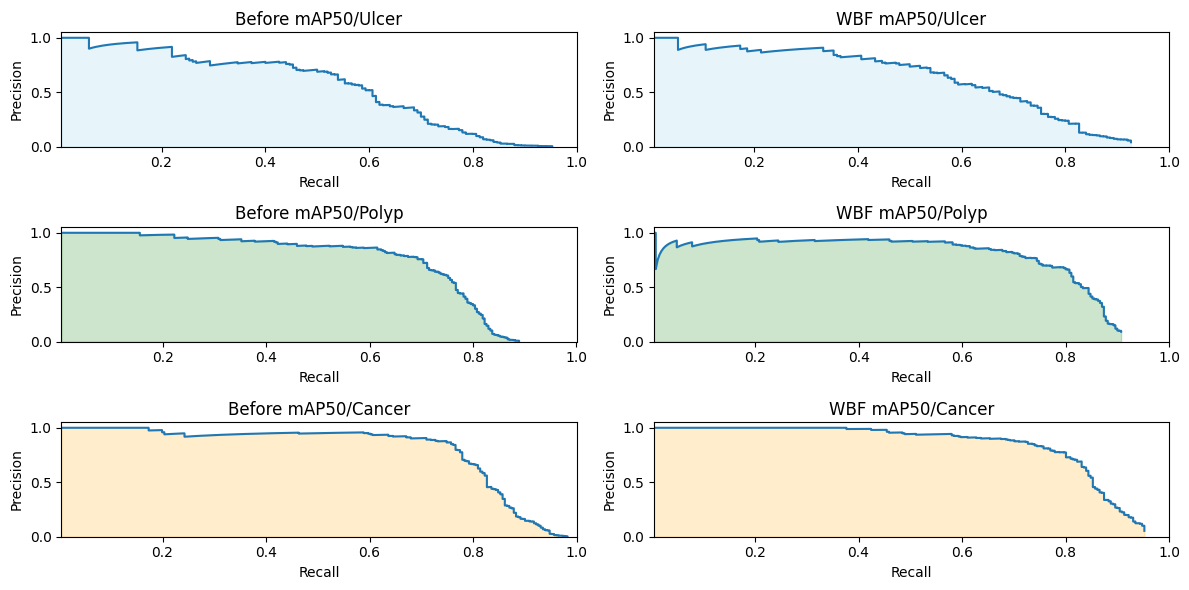

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(3,2,1)
plt.plot(recall_05_before_ulcer, precision_05_before_ulcer)
plt.fill_between(recall_05_before_ulcer, precision_05_before_ulcer, color='skyblue', alpha=0.2)
plt.title('Before mAP50/Ulcer')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.xlim([recall_05_before_ulcer.min(), 1.0])
plt.ylim([0.0, 1.05])

plt.subplot(3,2,2)
plt.plot(recall_05_after_ulcer, precision_05_after_ulcer)
plt.fill_between(recall_05_after_ulcer, precision_05_after_ulcer, color='skyblue', alpha=0.2)
plt.title('WBF mAP50/Ulcer')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.xlim([recall_05_after_ulcer.min(), 1.0])
plt.ylim([0.0, 1.05])

plt.subplot(3,2,3)
plt.plot(recall_05_before_polyp, precision_05_before_polyp)
plt.fill_between(recall_05_before_polyp, precision_05_before_polyp, color='green', alpha=0.2)
plt.title('Before mAP50/Polyp')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.xlim([recall_05_before_polyp.min(), 1.0])
plt.ylim([0.0, 1.05])

plt.subplot(3,2,4)
plt.plot(recall_05_after_polyp, precision_05_after_polyp)
plt.fill_between(recall_05_after_polyp, precision_05_after_polyp, color='green', alpha=0.2)
plt.title('WBF mAP50/Polyp')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.xlim([recall_05_after_polyp.min(), 1.0])
plt.ylim([0.0, 1.05])


plt.subplot(3,2,5)
plt.plot(recall_05_before_cancer, precision_05_before_cancer)
plt.fill_between(recall_05_before_cancer, precision_05_before_cancer, color='orange', alpha=0.2)
plt.title('Before mAP50/Cancer')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.xlim([recall_05_before_cancer.min(), 1.0])
plt.ylim([0.0, 1.05])

plt.subplot(3,2,6)
plt.plot(recall_05_after_cancer, precision_05_after_cancer)
plt.fill_between(recall_05_after_cancer, precision_05_after_cancer, color='orange', alpha=0.2)
plt.title('WBF mAP50/Cancer')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.xlim([recall_05_after_cancer.min(), 1.0])
plt.ylim([0.0, 1.05])


plt.tight_layout()
plt.show()

### Encoding PredictionString

In [ ]:
result_list = []

for i, image_id in tqdm(enumerate(wbf_df['image_id'].unique()), total=len(wbf_df['image_id'].unique())):
    tmp = wbf_df[wbf_df['image_id'] == image_id]
    boxes = tmp[['x_min','y_min','x_max','y_max']].values
    scores = tmp['score'].tolist()
    labels = tmp['lesion_label'].tolist()


    result = {
        'image_id': image_id,
        'PredictionString': format_pred(boxes, scores, labels)
    }
    result_list.append(result)

100%|██████████| 400/400 [00:02<00:00, 195.11it/s]


In [ ]:
submission_det = pd.DataFrame(result_list, columns=['image_id','PredictionString'])
print(display(submission_det))

,image_id,PredictionString
0,1_1_00030.png,0 0.31956831614176434 1037.8980712890625 1296....
1,1_1_00033.png,0 0.6826369166374207 552.1885986328125 1138.92...
2,1_1_00035.png,0 0.3940316438674927 940.74853515625 1003.7396...
3,1_1_00040.png,0 0.6409582297007242 639.4217529296875 1177.74...
4,1_1_00095.png,0 0.9013838768005371 691.735107421875 452.9165...
...,...,...
395,1_3_09783.png,2 0.9875612854957581 38.312339782714844 139.74...
396,1_3_09808.png,2 0.8174906373023987 240.05299377441406 216.43...
397,1_3_09826.png,2 0.7195666432380676 385.0738525390625 153.152...
398,1_3_09872.png,2 0.7225608229637146 40.52543640136719 137.893...


None
